# **Binary trees**

# Nodes and graphs

In this chapter, we will be learning about trees and graphs, which is probably the most common type of interview question (hash maps aren't really a "type" of question, and "array" or "string" is too broad). Trees and graphs are abstract data structures that show up everywhere in both the physical world and the software world. This is the longest chapter of the course, but for good reason. A huge amount of interview problems give trees or graphs as the input, and the entire problem is focused on them. As such, it is crucial that anyone going into a coding interview has a strong understanding of them.

Let's start by revisiting what a node is. We looked at nodes in the linked lists chapter - recall that a node is an abstract data type with two things. First, a node stores data. This data can be whatever you want - an integer, a boolean, a hash map, your own custom objects, or all of the above. Second, a node stores pointers to other nodes.

A graph is any collection of nodes and their pointers to other nodes. In fact, linked lists and trees are both types of graphs. As a topic, graphs are extremely broad. There is an entire field of study dedicated to graphs called graph theory.

Even though a tree is a type of graph, trees and graphs are considered different topics when it comes to algorithm problems. Because graphs are the more advanced/difficult topic, we will start by looking at trees.

    The nodes of a graph are also called vertices, and the pointers that connect them are called edges. In graphical representations, nodes/vertices are usually represented with circles and the edges are lines/arrows that connect the circles (we saw this in the linked lists chapter).

# What is a tree?

Like a linked list, a tree is a type of graph. Also like a linked list, there are multiple types of trees. In this course, we will be focusing on binary trees. Let's take a look at what a binary tree is.

    Recall that the start of a linked list was called the head. The start of a binary tree is called the root.

In a linked list, a node's pointer pointed to the next node. In a tree, a node has pointers to its children. If a node A is pointing to a node B, then B is a child of A, and A is the parent of B. The root is the only node that has no parent. Note that in a tree, a node cannot have more than one parent.

So what makes a binary tree "binary"? In a binary tree, all nodes have a maximum of two children. These children are referred to as the left child and the right child. Note that there isn't really a difference between a child being on the left or the right, it's just the convention used to refer to the children and convenient for graphical representations.

To summarize, a binary tree is a collection of nodes. Every node has between 0 to 2 children, and every node except the root has exactly one parent.

Here is an example of a binary tree:

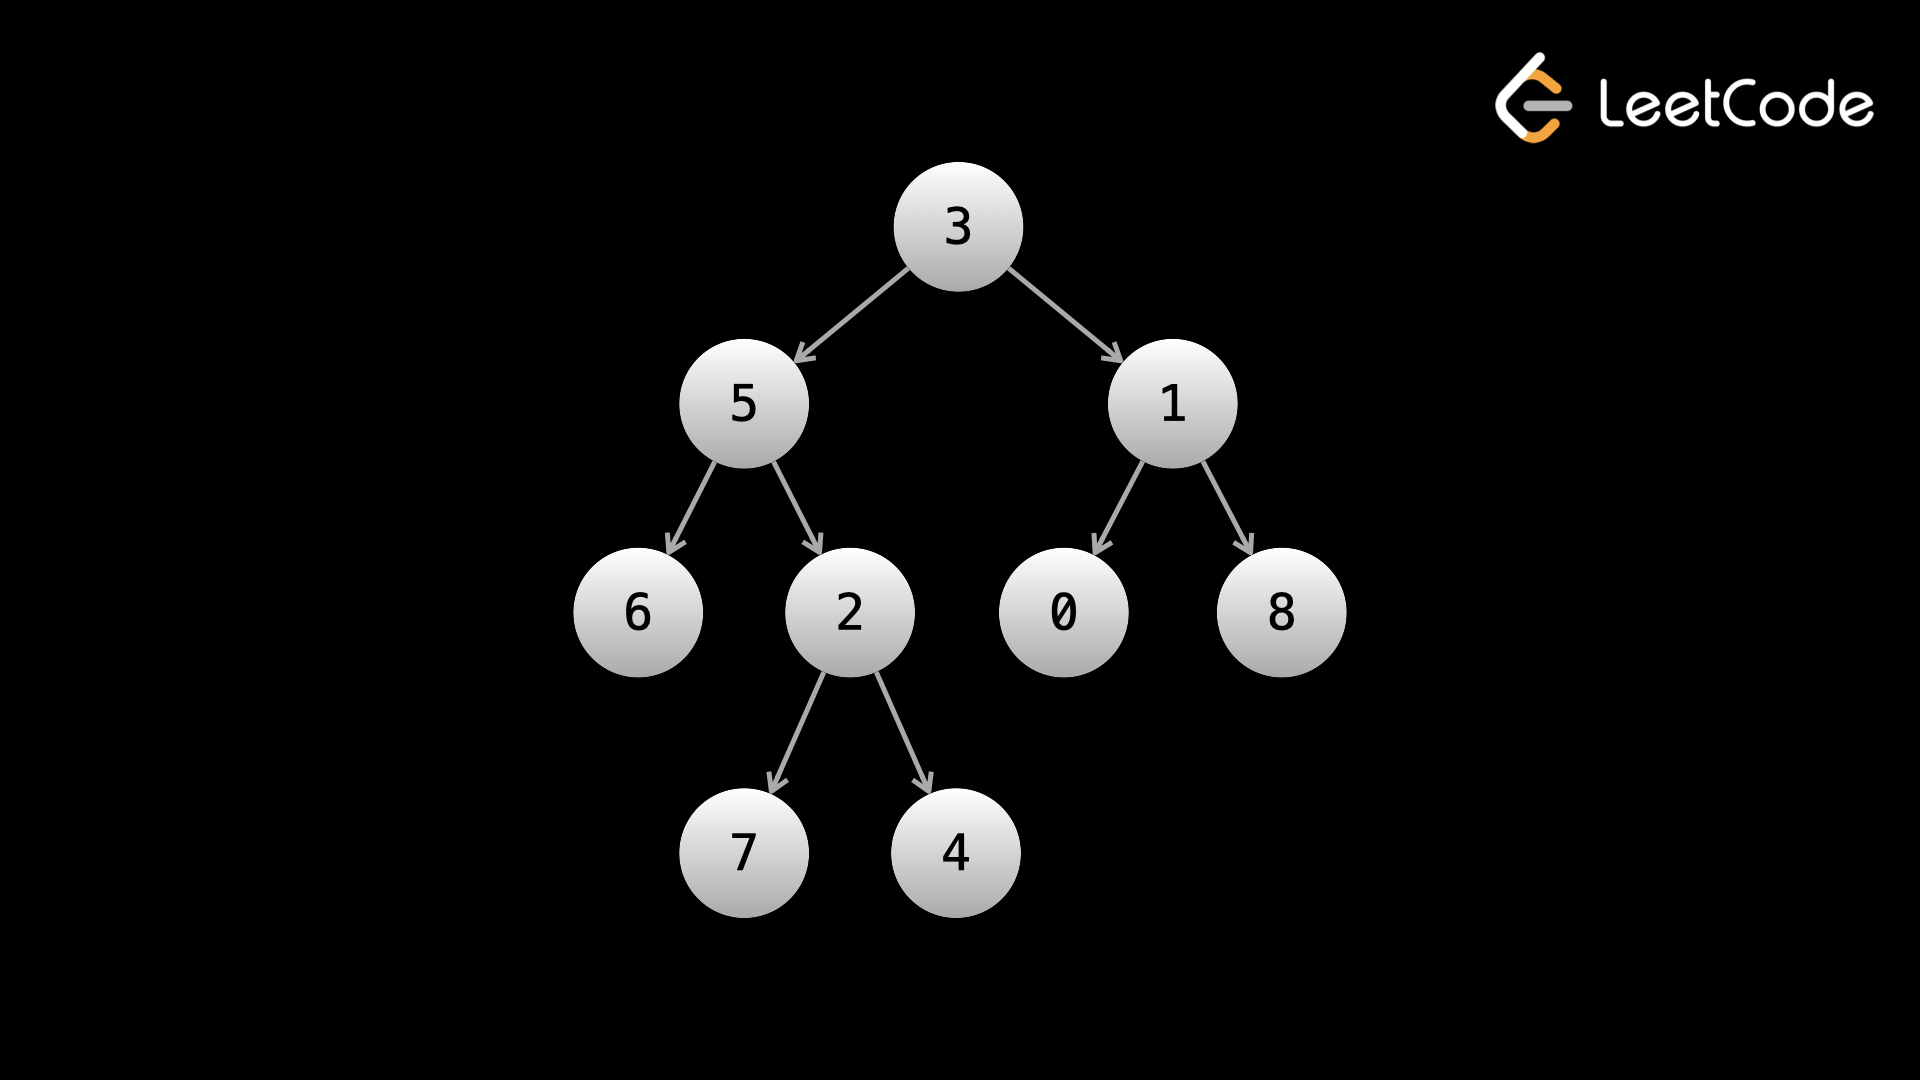

# Tree terminology

There is some tree-specific terminology that you will need to learn.

The root node is the node at the "top" of the tree. Every node in the tree is accessible starting from the root node. In most tree questions, the root of the tree will be given as the input, just like how in linked lists, the head was given as the input.

If you have a node A with an edge to a node B, so A -> B, we call A the parent of node B, and node B a child of node A.

If a node has no children, it is called a leaf node. The leaf nodes are the leaves of the tree.

The depth of a node is how far it is from the root node. The root has a depth of 0. Every child has a depth of parentsDepth + 1, so the root's children have a depth of 1, their children have a depth of 2, and so on.

Lastly, perhaps the most important thing to understand: a subtree of a tree is a node and all its descendants. Trees are recursive - you can treat a subtree as if it was its own tree with the chosen node being the root. What do we mean by this? Let's look at the company example again. The entire company is represented by the tree rooted at the CEO. But what if we only cared about the engineering department? Let's say the CTO has a direct report who is an SVP (Senior Vice President) of engineering, and all engineers are under this person. Take this SVP, and separate them from the rest of the company (remove their connection to the CTO). What are you left with? It's still a valid tree, but now the SVP is the root! This subtree now represents the engineering department instead of the entire company. This is the most fundamental idea for solving tree problems - you can take any given node and treat it as its own tree, which allows you to solve problems in a recursive manner.

To illustrate the concept of a subtree, take a look at the following image:

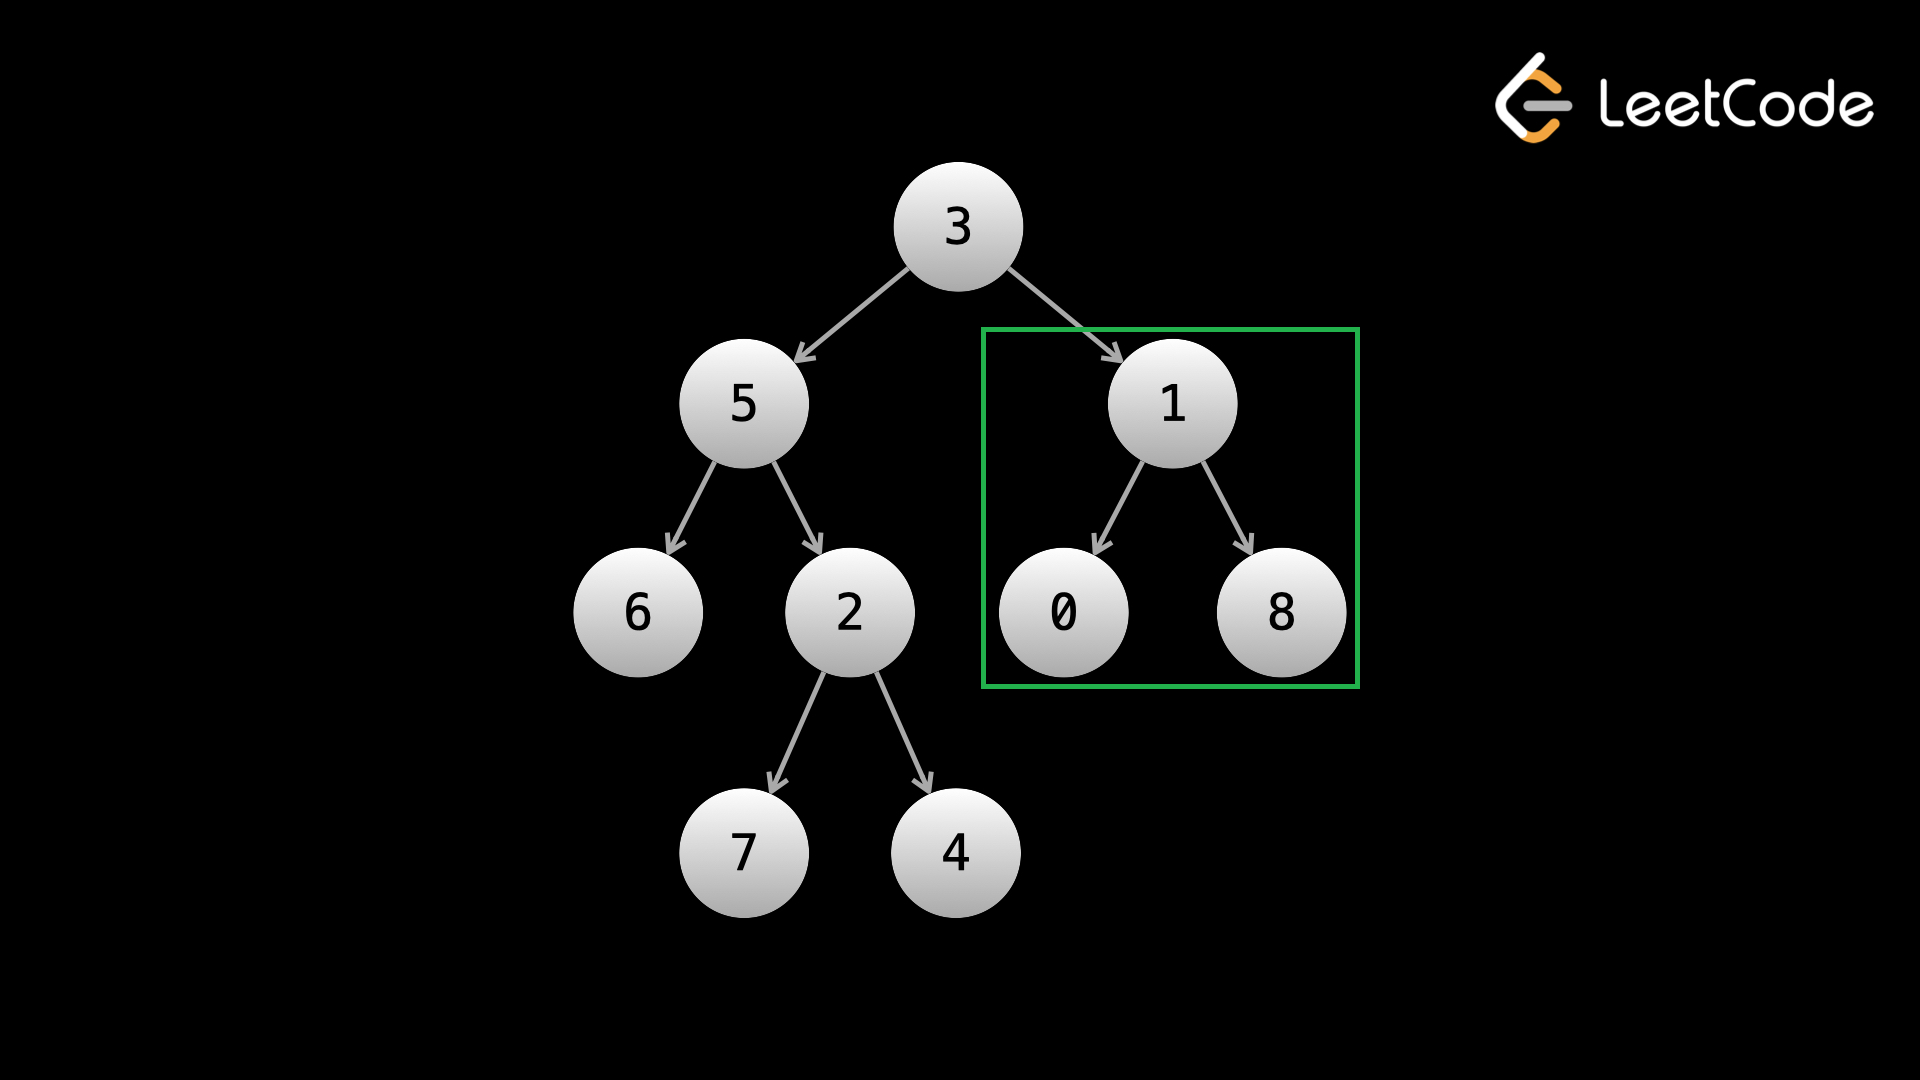

Enclosed in the green box is the subtree rooted at the node with value 1. This can be called the right subtree of the node with value 3 (the root). Notice that this subtree is a binary tree itself.

# Code representation
Just like with a linked list, binary trees are implemented using objects of a custom class. This is the typical class definition that will be provided to you in algorithm problems:

In [ ]:
class TreeNode:
    def __init__(self, val, left, right):
        self.val = val
        self.left = left
        self.right = right

#  Binary trees - DFS

In this article, we'll talk about how to traverse binary trees. Tree traversal is how we access the elements of a tree, and thus is mandatory for solving tree problems.

Recall that in the linked list chapter, we traversed a linked list using the following code:

In [1]:
def get_sum(head):
    ans = 0
    while head:
        ans += head.val
        head = head.next
    
    return ans

The above code starts at the head and visits each node to find the sum of all values in the linked list.

For each node, there is a moment in the code execution where the head variable is referencing the node. We traverse by using the .next attribute.

Traversing a binary tree follows the same idea. We start at the root and traverse by using the child pointers .left and .right. When traversing linked lists, we usually do it iteratively. With binary trees, we usually do it recursively.

There are two main types of tree traversals. The first is called depth-first search (DFS). For binary trees specifically, there are 3 ways to perform DFS - preorder, inorder, and postorder (don't worry though, the type you choose rarely matters). The other main type of traversal is called breadth-first search (BFS). Let's start by looking at DFS.

# Depth-first search (DFS)

    Recall that the depth of a node is its distance from the root.




In a DFS, we prioritize depth by traversing as far down the tree as possible in one direction (until reaching a leaf node) before considering the other direction. For example, let's say we choose left as our priority direction. We move exclusively with node.left until the left subtree has been fully explored. Then, we explore the right subtree.

Trees are named as such because they resemble real-life trees. You can think of the paths of a binary tree as branches growing from the root. DFS chooses a branch and goes as far down as possible. Once it fully explores the branch, it backtracks until it finds another unexplored branch.

Because we need to backtrack up the tree after reaching the end of a branch, DFS is typically implemented using recursion, although it is also sometimes done iteratively using a stack. Here is a simple example of recursive DFS to visit every node:

    Each call to dfs(node) is visiting that node. As you can see in the code, we visit the left child before visiting the right child.

In [ ]:
def dfs(node):
    if node == None:
        return

    dfs(node.left)
    dfs(node.right)
    return

<video controls src="20240226-2303-06.5444806.mp4" title="Title"></video>

The good news is that the structure for performing a DFS is very similar across all problems. It goes as follows:

- Handle the base case(s). Usually, an empty tree (node = null) is a base case.
- Do some logic for the current node
- Recursively call on the current node's children
- Return the answer

    As we will see in a moment, steps 2 and 3 may happen in different orders.



The most important thing to understand when it comes to solving binary tree problems is that each function call solves and returns the answer to the original problem as if the subtree rooted at the current node was the input. The logic that will be done at each call (step 2) will depend on the problem.

We mentioned that there are three types of DFS. Each of the three types differs only in the order that they execute steps 2/3.

Let's take a look at the types now, using the following tree as a talking point:

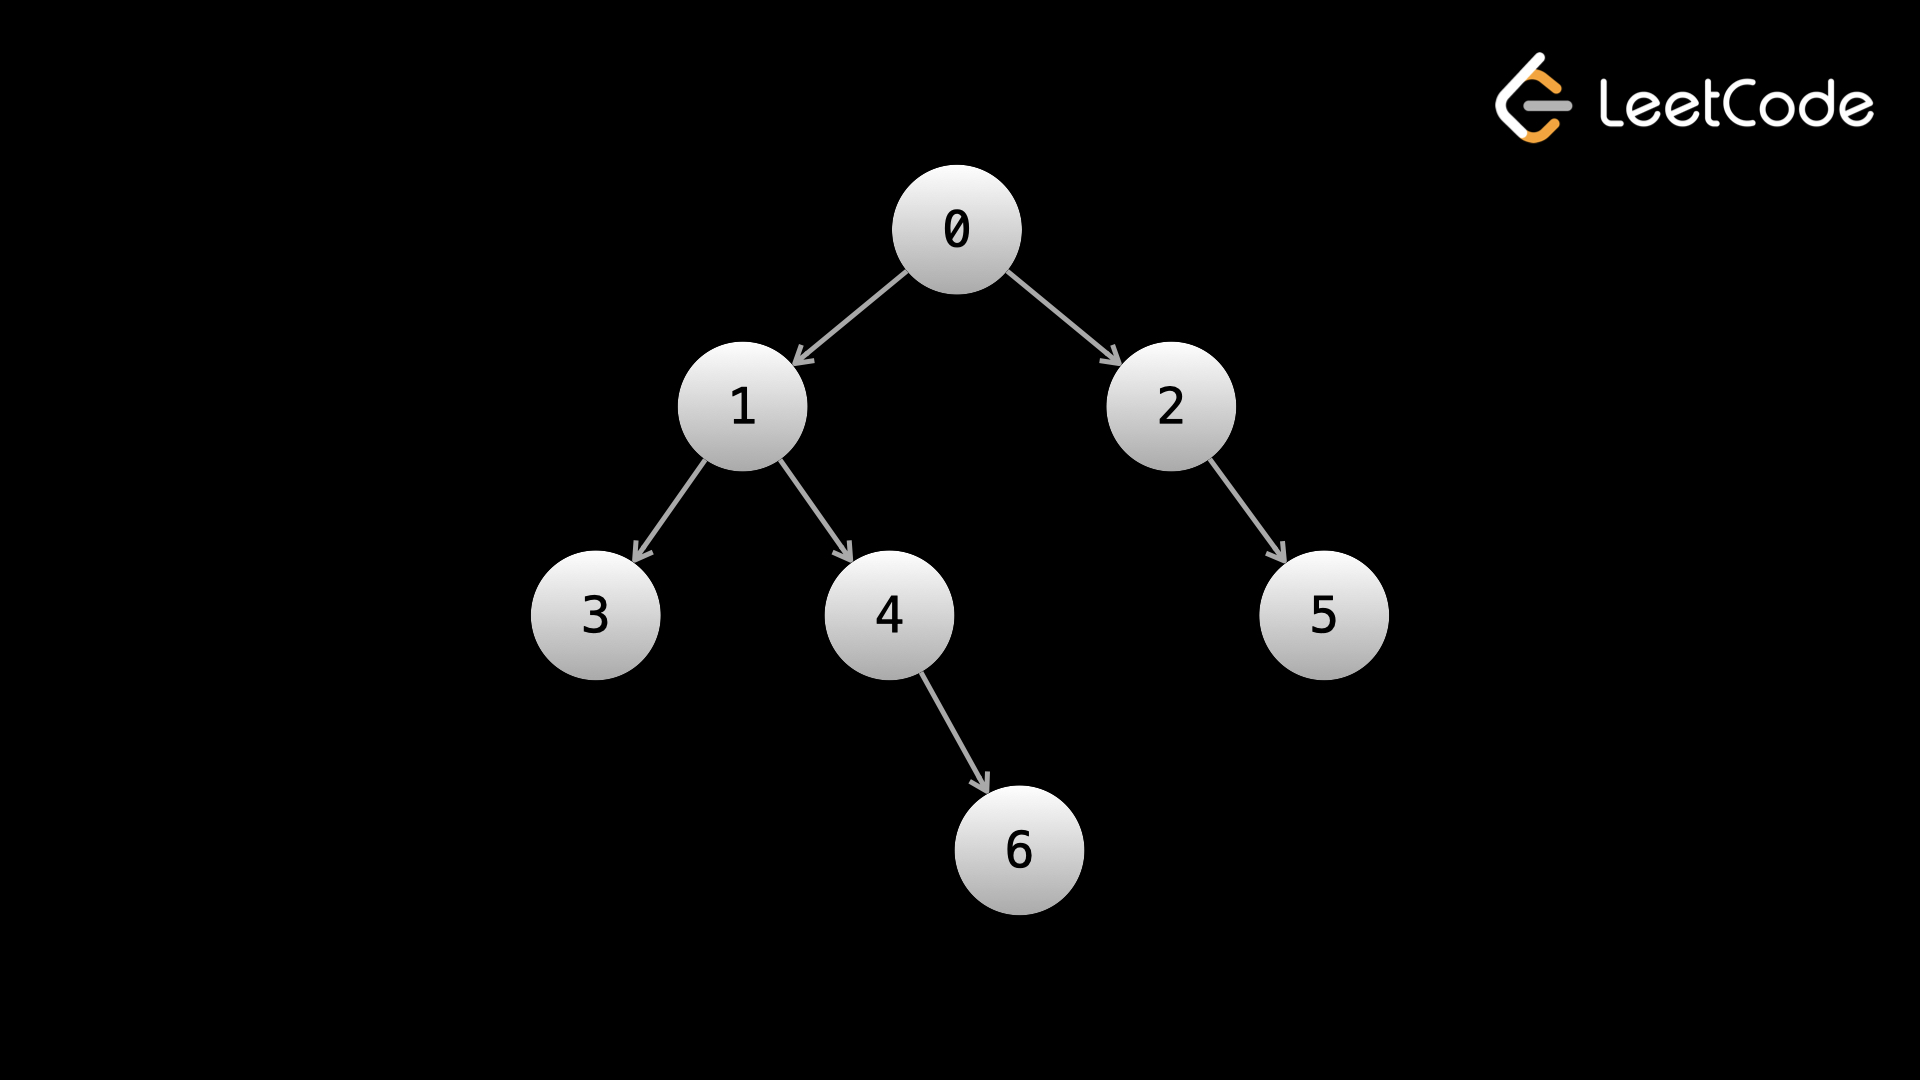

# Preorder traversal



In preorder traversal, logic is done on the current node before moving to the children. Let's say that we wanted to just print the value of each node in the tree to the console. In that case, at any given node, we would print the current node's value, then recursively call the left child, then recursively call the right child.

In [ ]:
def preorder_dfs(node):
    if not node:
        return

    print(node.val)
    preorder_dfs(node.left)
    preorder_dfs(node.right)
    return

Running the above code on the example tree, we would see the nodes printed in this order: 0, 1, 3, 4, 6, 2, 5.

Because the logic (printing) is done immediately at the start of each function call, preorder handles nodes in the same order that the function calls happen.

# Inorder traversal
For inorder traversal, we first recursively call the left child, then perform logic (print in this case) on the current node, and then recursively call the right child. This means no logic will be done until we reach a node without a left child since calling on the left child takes priority over performing logic.


In [ ]:
def inorder_dfs(node):
    if not node:
        return

    inorder_dfs(node.left)
    print(node.val)
    inorder_dfs(node.right)
    return

Running the above code on the example tree, we would see the nodes printed in this order: 3, 1, 4, 6, 0, 2, 5.

Notice that for any given node, its value is not printed until all values in the left subtree are printed, and values in its right subtree are not printed until after that.

# Postorder traversal

In postorder traversal, we recursively call on the children first and then perform logic on the current node. This means no logic will be done until we reach a leaf node since calling on the children takes priority over performing logic. In a postorder traversal, the root is the last node where logic is done.

In [ ]:
def postorder_dfs(node):
    if not node:
        return

    postorder_dfs(node.left)
    postorder_dfs(node.right)
    print(node.val)
    return

Running the above code on the example tree, we would see the nodes printed in this order: 3, 6, 4, 1, 5, 2, 0.

Notice that for any given node, no values in its right subtree are printed until all values in its left subtree are printed, and its own value is not printed until after that.

    The name of each traversal is describing when the current node's logic is performed.

    Pre -> before children

    In -> in the middle of children

    Post -> after children

Before we start solving problems, try playing around with binary trees in this interactive playground.

In [2]:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

"""
The following code builds a tree that looks like:
    0
  /   \
 1     2
"""

root = TreeNode(0)
one = TreeNode(1)
two = TreeNode(2)

root.left = one
root.right = two

print(root.left.val)
print(root.right.val)

1
2


# Solving problems with DFS


If you're worried about needing to know three different types of DFS, don't worry. If you're using recursion (which you should be), then switching between the three types is trivial.

In many problems, the type of DFS used doesn't even matter, it's just important that all nodes are visited. Knowing the differences between the three types of DFS is mostly good for trivia.

Let's look at some example binary tree problems that can be solved with DFS.

Example 1: 104. Maximum Depth of Binary Tree

Given the root of a binary tree, find the length of the longest path from the root to a leaf.

In [9]:
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution(object):
    def maxDepth(self, root):
        if not root:
            return 0
        left = self.maxDepth(root.left)
        right = self.maxDepth(root.right)

        return max(left, right) + 1

head = TreeNode(3)
nine = TreeNode(9)
twenty = TreeNode(20)
fifteen = TreeNode(15)
seven = TreeNode(7)

head.left = nine
head.right = twenty
twenty.left = fifteen
twenty.right = seven

Solution = Solution()
max_depth = Solution.maxDepth(head)
print(max_depth)
    


3


# What about an iterative implementation?



In the solution above, we are doing a postorder traversal because the logic for the current node (basically just the return statement) happens after the calls. All three types of DFS can be implemented iteratively, but postorder and inorder are more complicated to implement than preorder (which is very easy). As we mentioned earlier, for most problems, the type of DFS doesn't matter, so we'll take a look at a preorder DFS implemented iteratively.

To implement DFS iteratively, we need to use a stack. We don't have the return values to store the depths, so we will instead need to associate the current depth with each node on the stack. The method for pairing the values will depend on the language you are using. Of the most popular languages, it's easiest in Python as you can just store tuple literals in the stack. In other languages like Java, you need to use two stacks or create a pair object or some other method.

The code format for implementing DFS iteratively is also very similar across most problems, as you'll see in the next few examples.

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def maxDepth(self, root: Optional[TreeNode]) -> int:
        if not root:
            return 0
        
        stack = [(root, 1)]
        ans = 0
        
        while stack:
            node, depth = stack.pop()
            ans = max(ans, depth)
            if node.left:
                stack.append((node.left, depth + 1))
            if node.right:
                stack.append((node.right, depth + 1))
        
        return ans

This iterative implementation may be more intuitive if you are not used to recursion.

We are simply associating each node with its depth. For a given node with a depth of depth, the depth of the children will be depth + 1.

The format for performing the traversal with the stack is something that can be easily re-used between problems. We make use of a stack and use a while loop until the stack is empty. In each iteration of the while loop, we handle a single node - this is equivalent to a given function call in the recursive implementation. All the logic that is done in the function should be done in the while loop, including handling the children, which is done by pushing to the stack.

Example 2: 112. Path Sum

Given the root of a binary tree and an integer targetSum, return true if there exists a path from the root to a leaf such that the sum of the nodes on the path is equal to targetSum, and return false otherwise.

In [7]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution(object):
    def hasPathSum(self, root, targetSum):
        def dfs(node, curr):
            if not node:
                return False
            
            # if both children are null, then the node is a leaf
            if node.left == None and node.right == None:
                return (curr + node.val) == targetSum
            
            curr += node.val
            left = dfs(node.left, curr)
            right = dfs(node.right, curr)
            return left or right
      
        return dfs(root, 0)
root = TreeNode(5)
four = TreeNode(4)
eight = TreeNode(8)
eleven = TreeNode(11)
thirteen = TreeNode(13)
four_2 = TreeNode(4)
seven = TreeNode(7)
two = TreeNode(2)
one = TreeNode(1)


root.lef = four
root.right = eight

eleven.left = seven
eleven.right = two

eight.left = thirteen
eight.right = four_2

four_2.right = one

False

Example 3: 1448. Count Good Nodes in Binary Tree

Given the root of a binary tree, find the number of nodes that are good. A node is good if the path between the root and the node has no nodes with a greater value.

In [3]:
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution(object):
    def goodNodes(self, root):
        def dfs(node, max_so_far):
            if not node:
                return 0

            left = dfs(node.left, max(node.val, max_so_far))
            right = dfs(node.right, max(node.val,max_so_far))
            ans = left + right
            if node.val >= max_so_far:
                ans += 1
            return ans
        return dfs(root, float('-inf'))
root = TreeNode(3)
one = TreeNode(1)
four = TreeNode(4)
three = TreeNode(3)
one_2 = TreeNode(1)
five = TreeNode(5)

root.left = one
root.right = four
one.left = three
four.left = one_2
four.right = five

sol = Solution()

sol.goodNodes(root)




4

Example 4: 100. Same Tree

Given the roots of two binary trees p and q, check if they are the same tree. Two binary trees are the same tree if they are structurally identical and the nodes have the same values.